In [2]:
import re
import string
import numpy as np 
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression as lr
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import random as rnd
from sklearn.model_selection import train_test_split 
import string
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs


df=pd.read_json("D:\B.E\sem7\Project work stage1\cyberbullying\Dataset for Detection of Cyber-Trolls.json",lines=True)

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

D:\Software\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


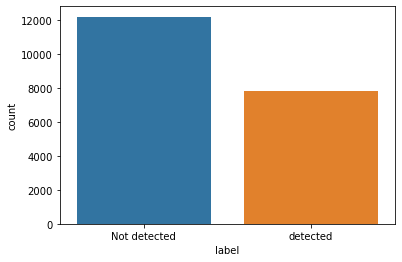

In [6]:
g = sns.countplot(df['label'])
g.set_xticklabels(['Not detected','detected'])
plt.show()

In [5]:
df["label"] = df.annotation.apply(lambda x: x.get('label'))
df["label"] = df.label.apply(lambda x: x[0])
df['label']=df['label'].astype(int)
df.drop(['extras'],inplace=True,axis=1)
df.head()

,content,annotation,label
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",1
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",1
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",1
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",1
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",1


In [7]:
x=df["content"]
y=df["label"]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42,shuffle=True)
print("X_train:",len(x_train))
print("X_test:",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))


X_train: 13400
X_test: 6600
y_train 13400
y_test 6600


In [9]:
freqs = build_freqs(x_train,y_train)

# check the output
print("type(freqs) = " + str(type(freqs)))
print("len(freqs) = " + str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 14318


In [9]:
freqs

{('hahahhahaahhahaha', 1): 3,
 ('lulz', 1): 24,
 ('still', 1): 114,
 ('cunt', 1): 45,
 ('hahahahahahahah', 1): 3,
 ("that'", 0): 153,
 ('ass', 0): 461,
 ('know', 0): 402,
 ('u', 0): 314,
 ('feel', 0): 163,
 ('drop', 0): 19,
 ('mine', 0): 38,
 ('street', 0): 11,
 ('last', 0): 137,
 ('week', 0): 65,
 ('crack', 0): 6,
 ('screen', 0): 5,
 ('stil', 0): 1,
 ('...', 0): 1100,
 ('sorri', 0): 108,
 (':(', 0): 105,
 ('like', 1): 360,
 ('zebra', 1): 6,
 ('man', 1): 147,
 ('said', 1): 76,
 ('rock', 1): 32,
 ('n', 1): 52,
 ('roll', 1): 14,
 ('park', 1): 4,
 ('lot', 1): 39,
 ('life', 1): 73,
 ('suck', 1): 539,
 ('shit', 1): 164,
 ('brb', 0): 1,
 ('slit', 0): 1,
 ('wrist', 0): 3,
 ('jesu', 0): 12,
 ('fuck', 0): 505,
 ('christ', 0): 5,
 ('omg', 1): 56,
 ('think', 0): 369,
 ('peopl', 0): 258,
 ('unprotect', 0): 1,
 ('sex', 0): 21,
 ('damn', 0): 888,
 ('jay', 0): 3,
 ('make', 0): 235,
 ('catchi', 0): 1,
 ('tune', 0): 5,
 ('anna', 1): 8,
 ('ruin', 1): 10,
 ('holiday', 1): 14,
 ('everi', 1): 35,
 ('year',

In [9]:
print('This is an example of a positive tweet: \n', x_train[7070])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(x_train[7070]))

This is an example of a positive tweet: 
 HAHAHHAHAAHHAHAHA LULZ   @Mod_Alex  your STILL a cunt!!!!! hahahahahahahah lulz lulz lulz lulz lulz

This is an example of the processed version of the tweet: 
 ['hahahhahaahhahaha', 'lulz', 'still', 'cunt', 'hahahahahahahah', 'lulz', 'lulz', 'lulz', 'lulz', 'lulz']


In [10]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    # loop through each word in the list of words
    for word in word_l:
        
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)
        
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)
    assert(x.shape == (1, 3))
    return x

In [11]:
print('This is an example of a positive tweet: \n', x_train[17244])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(x_train[17244]))
extract_features(x_train[17244],freqs)

This is an example of a positive tweet: 
   I did. And then realized I dont get on my account enough to follow a bazillion people and keep them all posted up on my life. So I deleted it. r So Im sticking with formspring :]

This is an example of the processed version of the tweet: 
 ['realiz', 'dont', 'get', 'account', 'enough', 'follow', 'bazillion', 'peopl', 'keep', 'post', 'life', 'delet', 'r', 'im', 'stick', 'formspr', ':]']


array([[1.000e+00, 1.043e+03, 1.854e+03]])

In [11]:
X = np.zeros((len(x_train), 3))
z=0
for i in x_train:
    X[z, :]= extract_features(i, freqs)
    z+=1

# training labels corresponding to X
Y = y_train

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(np.log(X[:,1]),np.log(X[:,2]),Y,c=Y)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(np.log(X[:,1]),np.log(X[:,2]),Y,c=Y)

<ipython-input-62-68015a252fd7>:3: RuntimeWarning: divide by zero encountered in log
  sctt=ax.scatter3D(np.log(X[:,1]),np.log(X[:,2]),Decision_Function,c=Y)


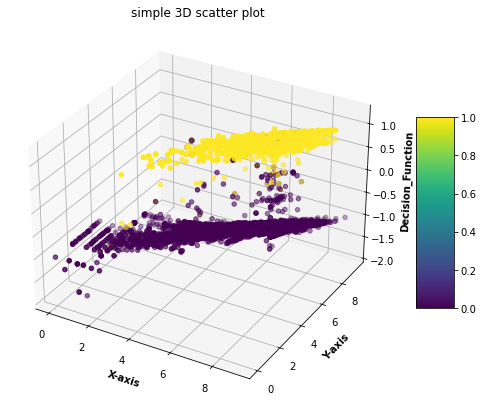

In [62]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
sctt=ax.scatter3D(np.log(X[:,1]),np.log(X[:,2]),Decision_Function,c=Y)

plt.title("simple 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Decision_Function', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

ValueError: x and y must have same first dimension, but have shapes (13400,) and (1, 11787)

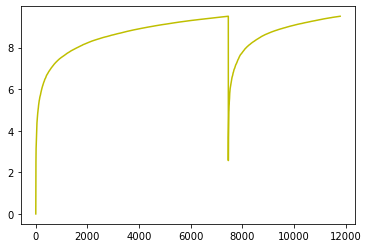

In [60]:
#plt.scatter(X[:,1],X[:,2],c=Y)
plt.plot(np.log(svm_clf.support_),c='y')
plt.plot(Decision_Function,c='r')


In [68]:
svm_clf.dual_coef_

array([[-0.51176092, -0.49353625, -0.51077429, ...,  0.82107843,
         0.82107843,  0.82107843]])

In [ ]:
plt.plot((-svm_clf.intercept_/svm_clf.dual_coef_).T*X[:,1]+svm_clf.intercept_)

In [19]:
svm_clf = SVC(gamma="auto", random_state=0,class_weight='balanced',probability=True)
svm_clf.fit(X,Y)


SVC(class_weight='balanced', gamma='auto', probability=True, random_state=0)

In [20]:
Decision_Function = svm_clf.decision_function(X)
print('Output of Decision Function is:', Decision_Function)

Output of Decision Function is: [ 0.9995109  -1.00048908  1.00000612 ...  1.00034189  1.00004242
 -1.00048158]


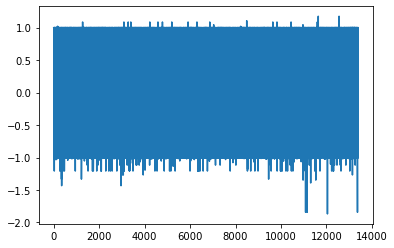

In [21]:
plt.plot(Decision_Function)

In [16]:
X_t= np.zeros((len(x_test), 3))
z=0
for i in x_test:
    X_t[z, :]= extract_features(i, freqs)
    z+=1
Y_t=y_test

In [40]:
y_pred = svm_clf.predict(X_t)
print(svm_clf.__class__.__name__, accuracy_score(Y_t, y_pred))


SVC 0.9383333333333334


In [16]:
confusion_matrix(Y_t,y_pred)

array([[3934,   85],
       [ 346, 2235]], dtype=int64)

In [17]:
print(classification_report(Y_t,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4019
           1       0.96      0.87      0.91      2581

    accuracy                           0.93      6600
   macro avg       0.94      0.92      0.93      6600
weighted avg       0.94      0.93      0.93      6600



In [19]:
df=pd.DataFrame(x_test)
df['y_pred']=y_pred
df['y_test']=y_test
df.to_csv("final_result.csv",index=False)

In [41]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

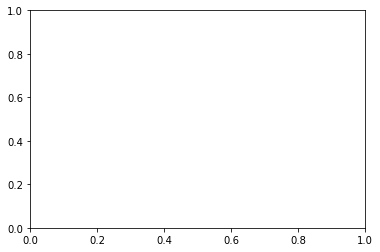

In [50]:
svm_clf.coef0

0.0

In [46]:
X

array([[ 3.1368855 ,  1.56592763],
       [ 1.4815332 ,  0.67875364],
       [ 0.3498724 ,  4.69253251],
       [ 0.5323772 ,  3.31338909],
       [ 2.64928242,  1.05613497],
       [ 1.2091013 ,  3.53566548],
       [ 0.99914934,  4.2101954 ],
       [ 3.01673853,  1.63792106],
       [ 0.78260667,  4.15263595],
       [ 1.65356269,  0.55288877],
       [ 0.802314  ,  4.38196181],
       [ 1.8706766 ,  0.77797407],
       [ 1.08040757,  4.79210685],
       [ 0.5226209 ,  4.32976003],
       [ 1.92126584,  1.29889186],
       [ 3.24683991,  1.3699034 ],
       [ 2.61858548,  0.35769791],
       [ 0.64003985,  4.12401075],
       [ 1.39731382,  0.66687136],
       [ 1.67030948,  1.16728826],
       [ 1.05374379,  4.49286859],
       [ 0.82049381,  4.33187   ],
       [ 1.68548602,  1.66917096],
       [ 0.39369516,  4.75420057],
       [ 2.31690585,  0.81189049],
       [ 0.92466065,  4.50908658],
       [ 1.68289011,  0.48444439],
       [ 0.98152009,  5.19672257],
       [ 1.19820169,